1. Mount Google drive

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import Dataset Pandas

In [19]:
!pip install -U gdown


In [4]:
import gdown

# Replace with your actual file ID
file_id = "1r59ncZKsikao7W6k7oOBD7SmYc5wHfKN"
url = f"https://drive.google.com/uc?id={file_id}"

# Choose any filename you want
output = "cicids_sample.csv"

# Download
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1r59ncZKsikao7W6k7oOBD7SmYc5wHfKN
From (redirected): https://drive.google.com/uc?id=1r59ncZKsikao7W6k7oOBD7SmYc5wHfKN&confirm=t&uuid=82575135-8ce9-433c-a4fb-649bf9929f4c
To: /content/cicids_sample.csv
100%|██████████| 438M/438M [00:10<00:00, 41.6MB/s]


'cicids_sample.csv'

In [5]:
import pandas as pd

df = pd.read_csv("cicids_sample.csv")
df.head()


,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,146275,3389,6,5206015,9,11,1213,1948,661,0,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1,512109,443,6,60991608,14,14,1211,3396,875,0,...,20,116504.666667,117401.762867,356150,68519,1.000239e+07,1.665183e+04,10009249,9968397,1
2,807703,53,17,27292,1,1,45,163,45,45,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
3,491912,443,6,70343424,17,20,1118,5653,258,0,...,20,527683.500000,386311.526445,800847,254520,3.457024e+07,3.406089e+07,58654921,10485549,1
4,858679,53,17,137267,2,2,94,214,47,47,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1


In [6]:
df.tail()


,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1252841,940974,64678,6,1397,5,2,935,267,935,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1252842,45433,51274,6,1,3,0,77,0,46,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1252843,912254,80,6,233,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1252844,990683,53,17,23818,1,1,34,204,34,34,...,8,0.0,0.0,0,0,0.0,0.0,0,0,1
1252845,576130,80,6,70,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


<Axes: ylabel='Fwd Pkt Len Max'>

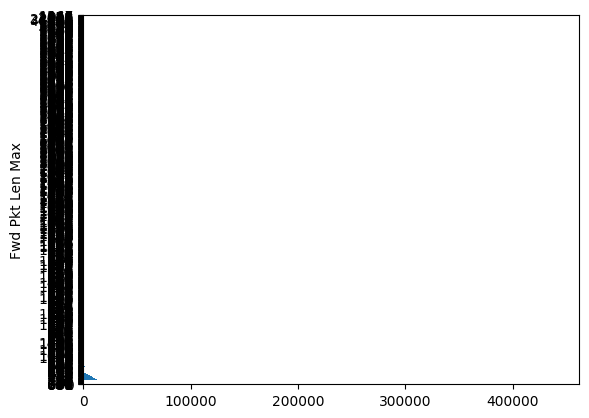

In [7]:
import matplotlib.pyplot as plt
df['Fwd Pkt Len Max'].value_counts().plot(kind='barh')

<Axes: ylabel='count'>

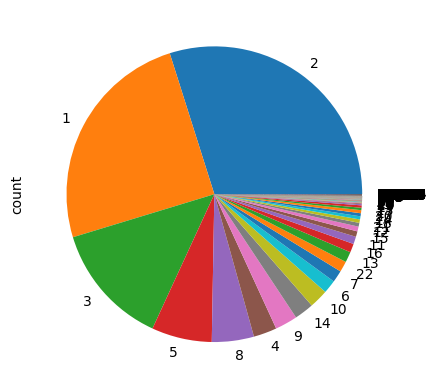

In [8]:
df['Tot Fwd Pkts'].value_counts().plot(kind='pie')

<Axes: ylabel='Frequency'>

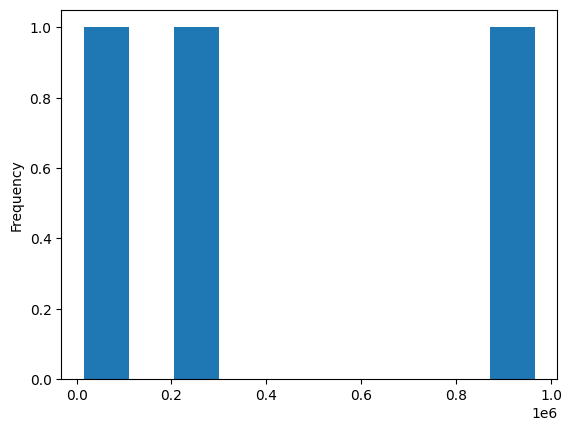

In [9]:
df['Protocol'].value_counts().plot(kind='hist')

In [10]:
type(df)

pandas.core.frame.DataFrame

<Axes: title={'center': 'Fwd Pkt Len Max over Rows'}>

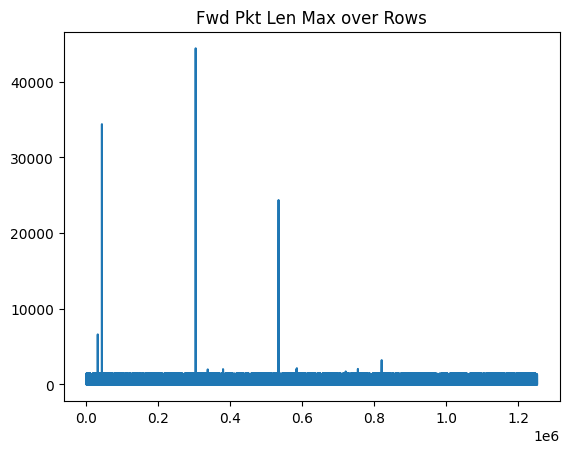

In [11]:
df['Fwd Pkt Len Max'].plot(kind='line', title='Fwd Pkt Len Max over Rows')


In [12]:
df.shape

(1252846, 79)

In [13]:
df.isnull().sum()


,0
Unnamed: 0,0
Dst Port,0
Protocol,0
Flow Duration,0
Tot Fwd Pkts,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [14]:
df.duplicated().sum()


np.int64(117437)

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('Label', axis=1)  # All columns except the target
y = df['Label']               # The target column

# Step 1: First split into train and temp (test + val)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Split temp into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [16]:
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (876992, 78)
Validation: (187927, 78)
Test: (187927, 78)


In [17]:
# Total number of rows
total_rows = len(X)  # or len(df)

# Individual counts
train_pct = len(X_train) / total_rows * 100
val_pct = len(X_val) / total_rows * 100
test_pct = len(X_test) / total_rows * 100

# Print nicely
print(f"Train set: {train_pct:.2f}%")
print(f"Validation set: {val_pct:.2f}%")
print(f"Test set: {test_pct:.2f}%")


Train set: 70.00%
Validation set: 15.00%
Test set: 15.00%


In [20]:
df.shape


(1252846, 79)